# First Project: Single-Feature Neural Network Regression

# Goal:
# Implement a basic Artificial Neural Network (ANN) for predicting house prices based on a single feature: house size.

# Solution:


In [ ]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Create a simple dataset
# Let's simulate some data for house sizes (in square feet) and corresponding prices (in $1000s)
np.random.seed(42)  # For reproducibility
house_size = np.random.randint(500, 3500, 10000)  # House sizes between 500 and 3500 sq ft
house_price = house_size * 0.3 + np.random.normal(0, 100, 10000)  # Price = size * 0.3 + noise

# Convert to a DataFrame for easier manipulation
data = pd.DataFrame({"House Size (sq ft)": house_size, "Price ($1000s)": house_price})



# Step 2: Visualize the data

Dataset preview:
   House Size (sq ft)  Price ($1000s)
0                1360      274.929487
1                1794      320.403227
2                1630      419.058546
3                1595      494.669853
4                2138      651.685858


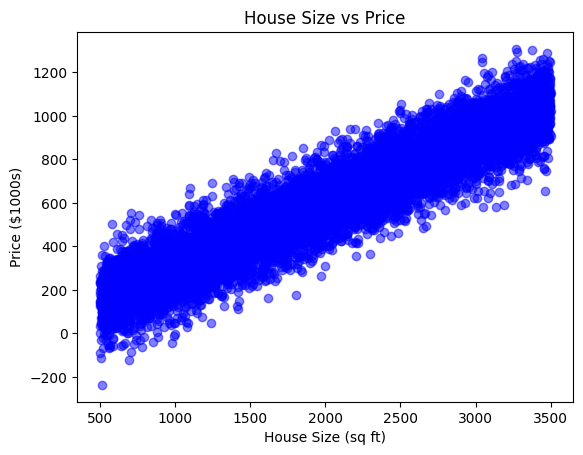

In [ ]:

print("Dataset preview:")
print(data.head())

plt.scatter(data["House Size (sq ft)"], data["Price ($1000s)"], color="blue", alpha=0.5)
plt.title("House Size vs Price")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.show()



# Step 3: Split the data into training and testing sets


In [ ]:

X = data[["House Size (sq ft)"]]  # Features
y = data["Price ($1000s)"]         # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 4: Scale the feature

In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
y=y.values.reshape(-1, 1)
scaler_X.fit(X)
scaler_y.fit(y)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


# Step 5: Build the ANN model


In [ ]:
model = Sequential([
    Dense(8, input_dim=1, activation='relu'),  # Input layer with 1 feature and 32 neurons
    Dense(4, activation='relu'),               # Hidden layer with 16 neurons
    Dense(1, activation='linear')               # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 6: Train the model

In [ ]:

history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=10, validation_split=0.2, verbose=1)



Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1229 - mae: 0.2821 - val_loss: 0.0119 - val_mae: 0.0894
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0092 - mae: 0.0774 - val_loss: 0.0047 - val_mae: 0.0537
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0042 - mae: 0.0520 - val_loss: 0.0043 - val_mae: 0.0518
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0042 - mae: 0.0514 - val_loss: 0.0043 - val_mae: 0.0518
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - mae: 0.0525 - val_loss: 0.0042 - val_mae: 0.0517
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042 - mae: 0.0515 - val_loss: 0.0042 - val_mae: 0.0517
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042 - mae: 0.0511 - val_loss: 0.0043 - val_mae: 0.0520
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - mae: 0.0521 - val_loss: 0.0042 - val_mae: 0.0517
Epoch 9/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/


# Step 7: Evaluate the model

In [ ]:

y_pred = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)            # R-squared score
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model Evaluation:
Mean Squared Error: 10669.19
R-squared Score: 0.86


# Step 8: Visualize actual vs predicted prices

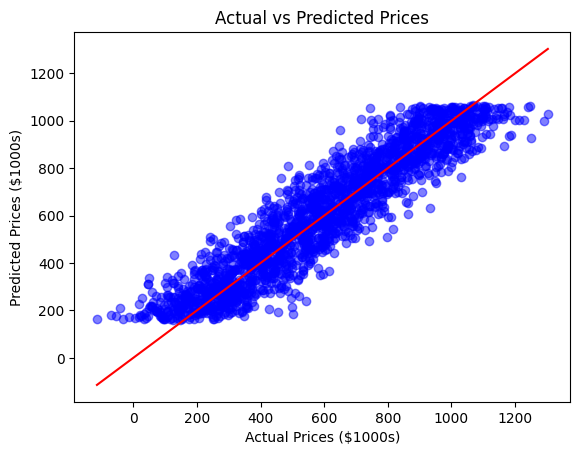

In [ ]:

plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")  # Perfect prediction line
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.show()


# Additional step: Make a prediction for a new house

In [ ]:

new_house = np.array([[2000]])  # Predict price for a 2000 sq ft house
new_house_scaled = scaler_X.transform(new_house)
predicted_price = model.predict(new_house_scaled)
predicted_price = scaler_y.inverse_transform(predicted_price)
print(f"Predicted price for a 2000 sq ft house: ${predicted_price[0][0] * 1000:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted price for a 2000 sq ft house: $-1030619.14


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
